Dim. action space: (4,)
Dim. observation space: (24,)
--- Generation 0 ---
INFO:root:Time for diversity calculation: 9.52500033378601


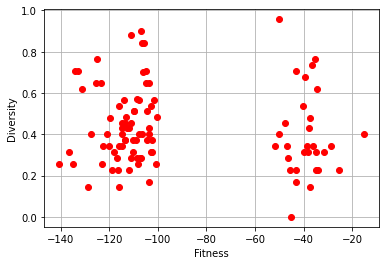

INFO:root:max fitness: -15.249504725878726
INFO:root:50 survived walker
Time: 16.13 sec
--- Generation 1 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:47 survived walker
Time: 3.63 sec
--- Generation 2 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:50 survived walker
Time: 2.96 sec
--- Generation 3 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:52 survived walker
Time: 3.58 sec
--- Generation 4 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:49 survived walker
Time: 3.53 sec
--- Generation 5 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:52 survived walker
Time: 4.27 sec
--- Generation 6 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:58 survived walker
Time: 4.50 sec
--- Generation 7 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:46 survived walker
Time: 4.19 sec
--- Generation 8 ---
INFO:root:max fitness: -15.249504725878726
INFO:root:48 survived walker
Time: 3.20 sec
--- Generation 9 ---
INFO:root:max fitness: -15.

KeyboardInterrupt: 

In [1]:
import gym
import time
from src.evolutionCtrl import Population_Manager
from src.trainEval import TrainEval
import logging

logging.basicConfig(level=logging.INFO)
gym.logger.set_level(40)

# create gym Environment
env = gym.make("BipedalWalker-v3")
print(f"Dim. action space: {env.action_space.shape}")
print(f"Dim. observation space: {env.observation_space.shape}")

# training Params
Const = {
    'POP_SIZE': 100,
    'MUTATION_RATE': .1,
    'PROB_NODE_COPY': .1,
    'N_PARENTS': 2,
    'WEIGHT_INIT_INTERVAL': [-1.0, 1.0],
    'N_LAYER_NODES': [env.observation_space.shape[0],
                      35,
                      env.action_space.shape[0]]
}

MAX_SEQUENCE_LEN = 400
N_GENERATIONS = 2500

pop_manager = Population_Manager(Const)

train_evaluator = TrainEval()


def agent_env_loop(entity, generation):
    entity.survived = True
    entity.fitness = 0
    env.seed(10)
    observation = env.reset()                                 # s_0

    for i in range(MAX_SEQUENCE_LEN):

        action = entity.controller.feed_forward(observation)  # a_t, s_t
        observation, reward, done, _ = env.step(action)  # s_{t+1}, r_{t+1}

        entity.fitness += reward
        if done:
            break


if __name__ == '__main__':
    for generation in range(N_GENERATIONS):
        t_start = time.time()

        print(f"--- Generation {generation} ---")
        for entity in pop_manager.population:
            if not entity.survived:
                agent_env_loop(entity, generation)

        if generation % 100 == 0:
            train_evaluator.eval_training(pop_manager.population)

        pop_manager.breed_new_population()

        print(f"Time: {(time.time() - t_start):.2f} sec")


In [ ]:
# TODO:
# ---------- diversity measure
# phenotype-based diversity measure (e.g. FFT of action sequence) vs. genotype based (hamming distance)
# diversity = 0 ?

# ---------- analyse
# weight distribution analysis (e.g. 99 fitness solution compared to 72)

# ---------- implementation
# multiparent recombination
# two child approach
# one point crossover, n-point crossover, uniform crossover 
# generalization

# ? aging
# ? parameter noise
# ? type checking
# properties

######################################################################################################################
# POP_SIZE = 100
# MAX_SEQUENCE_LEN = 400
# N_GENERATIONS = 2000
# MUTATION_RATE = .1
# PROB_NODE_COPY = .1
# WEIGHT_INIT_INTERVAL = [-1.0, 1.0]
# WELFORD = False

# 50 -> 99 fitness, 2000 gen
# 48,48,32 -> 75 fitness
# 32 -> 70, 2500 gen

In [11]:
pop_manager.population.sort(key=lambda x: x.fitness, reverse=True) 
best_agent = pop_manager.population[5]
best_agent.fitness

56.074588818497155

In [12]:
env.seed(10) 
observation = env.reset()
reward_test = .0
obs_list = []
for _ in range(MAX_SEQUENCE_LEN):
    env.render()
    action = best_agent.controller.feed_forward(observation)            # a_t, s_t            
    observation, reward, done, _ = env.step(action)                     # s_{t+1}, r_{t+1}, a_t 
    obs_list.append(observation)
    reward_test += reward
env.close()
reward_test

57.91824195449292

In [37]:
import numpy as np
for i, weights in enumerate(best_agent.controller.weights):
    np.savetxt("layer_" + str(i), weights)
    np.savetxt("bias_" + str(i), best_agent.controller.bias[i])

In [35]:
class testclass(object):
    def __init__(self):
        self.weights = [[1,2,3], [4,5,6]]

x = testclass()

In [36]:
y = x.weights[0]
y

[1, 2, 3]

In [37]:
y[0] = 7

In [38]:
x.weights[0]

[7, 2, 3]

In [39]:
y

[7, 2, 3]

In [34]:
a = [1,2,3]
b = a
b[0] = 4
a

[4, 2, 3]

In [5]:
import numpy as np
weights = np.random.uniform(-1.0, 1.0, (4, 3))
weights_2 = np.random.uniform(-1.0, 1.0, (4, 3))

In [21]:
from difflib import SequenceMatcher as SequMatch

rat = 0.0
for i in range(len(weights)):
    sm = SequMatch(None, weights[i].round(1), weights_2[i].round(1))
    rat += sm.ratio()
weights
weights_2
#rat

array([[-0.13601143,  0.97048332, -0.8253675 ],
       [ 0.72817677,  0.75721678,  0.75244338],
       [-0.26970826, -0.59656433,  0.79409955],
       [-0.86833561, -0.64606015, -0.6582288 ]])

In [10]:
np.random.uniform(low = -1.0, high = 1.0, size = 3)

array([0.96191887, 0.5971491 , 0.52781256])

In [1]:
id(2)

140703733913392

In [3]:
id(2.0)

1553873537200